In [2]:
!pip install pandas_profiling --upgrade

     |████████████████████████████████| 266kB 3.3MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 604kB 13.7MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 3.1MB 15.6MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 296kB 38.6MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=42fd91faf9f77b5f57857e969e99180b57981ec5303533e58ac213bbd66e447b
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=153f76f6b6031db3b98ce195fb6f379cd8e5647bb818c954561a3860bb5b4f77
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Found existing installation: tqdm 4.41.1
    Un

In [8]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [4]:
plt.rcParams['figure.figsize'] = (12,8)

In [5]:
hr = pd.read_csv('/content/employee_data.csv')
hr_orig = hr
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Pandas Profiling:

In [9]:
profile = ProfileReport(hr, title='Employee Profiling Report', explorative=True)

In [10]:
profile

In [11]:
profile.to_file("Employee_report.html")

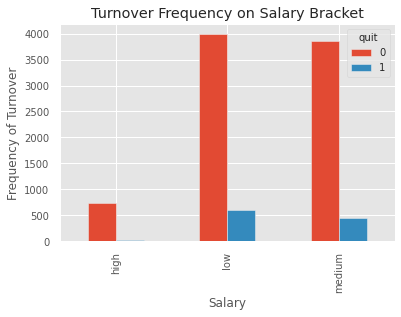

In [19]:
pd.crosstab(hr.salary,hr.quit).plot(kind='bar')
plt.title('Turnover Frequency on Salary Bracket')
plt.xlabel('Salary')
plt.ylabel('Frequency of Turnover')
plt.show()

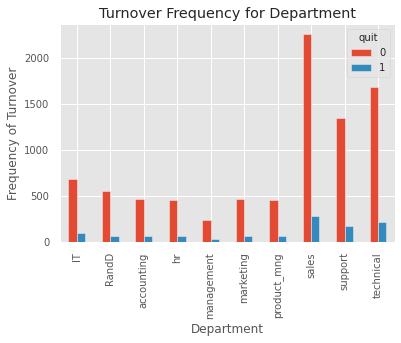

In [20]:
pd.crosstab(hr.department,hr.quit).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.show()

In [21]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [22]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department', 'salary', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [23]:
hr.drop(columns=['department','salary'], axis=1, inplace=True)
#hr.drop(hr.columns[[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]], axis=1, inplace=True)

In [24]:
from yellowbrick.target import ClassBalance
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12,8)

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f08d76d0b38>,
             labels=['stayed', 'quit'])

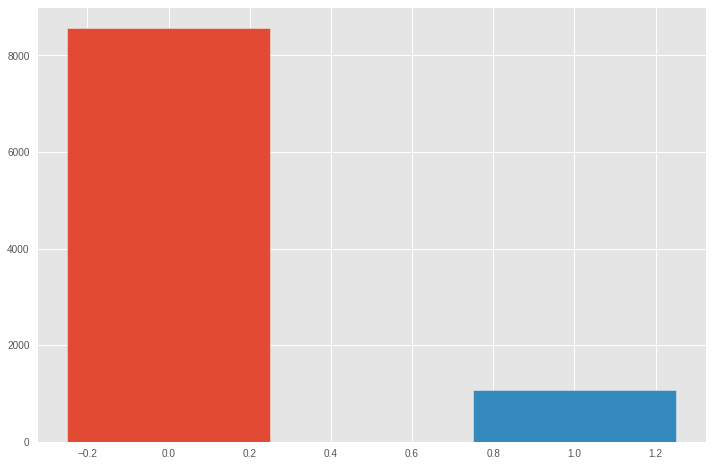

In [27]:
visualizer = ClassBalance(labels=["stayed", "quit"])

visualizer.fit(hr.quit)
#visualizer.show()

In [28]:
hr['quit'].value_counts()

0    8572
1    1081
Name: quit, dtype: int64

In [29]:
hr.to_csv('Employee_new.csv',index=None)